# Restaurant Recommendation system

# #Transforming the raw data to required cleaned data

In [85]:
# Raw data 
import pandas as pd    
dataframe_business= pd.read_csv("datframe_business.csv")  
dataframe_business.head()

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",NaN
2,2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,NaN,"Pets, Pet Services, Pet Groomers",NaN
3,3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726649,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."


### Filtering the  data.If the bussiness is restaraunt or has restraunt then it should have  "RestaurantsTakeOut" in its attributes

In [86]:
#Here using RestaurantsTakeOut attributes as filters we are identifing at which indexes we have restraunts a
indexlist=[]# list to collect indexs where we have restarants or food related data
nolist=[]#list to collect indexes related to other bussinesses, so that we can delete them later
AttributesList=dataframe_business['attributes']
reqtype=type(AttributesList[0])
for i in range(len(AttributesList)):
    if type(AttributesList[i])==reqtype:#it is str
        splitlist=AttributesList[i].split("RestaurantsTakeOut")
        if len(splitlist)>1:
            #restraunts is present
            indexlist.append(i)
        else:
            nolist.append(i)
    else:
        nolist.append(i)
               
print(len(indexlist))#how many rows of restaraunts related data present
print(len(nolist))#how many rows of other bussinesses related data present

66301
143092


In [87]:
#Restauntsdataframe will have only restraunts or food related data
Restauntsdataframe=dataframe_business.drop(index=nolist)
Restauntsdataframe.head()


,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
8,8,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,404 E Green St,Champaign,IL,61820,40.110446,-88.233073,4.5,5,1,"{'RestaurantsAttire': ""u'casual'"", 'Restaurant...","Ethnic Food, Food Trucks, Specialty Food, Impo...","{'Monday': '11:30-14:30', 'Tuesday': '11:30-14..."
12,12,M_guz7Dj7hX0evS672wIwA,Chocolate Shoppe Ice Cream,2831 Parmenter St,Middleton,WI,53562,43.105310,-89.510142,3.5,6,1,"{'BikeParking': 'True', 'Caters': 'True', 'Whe...","Desserts, Food, Ice Cream & Frozen Yogurt","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."
20,20,CsLQLiRoafpJPJSkNX2h5Q,Middle East Deli,4508 E Independence Blvd,Charlotte,NC,28205,35.194894,-80.767442,3.0,5,0,"{'RestaurantsGoodForGroups': 'True', 'OutdoorS...","Food, Restaurants, Grocery, Middle Eastern",NaN
21,21,x3Po6tJGb729u_HJPY6UCA,Glendale Glitters,5850 W Glendale Avenue,Glendale,AZ,85301,33.538950,-112.185178,2.5,52,1,"{'GoodForKids': 'True', 'BikeParking': 'True',...","Arts & Entertainment, Festivals, Local Flavor","{'Friday': '18:0-22:0', 'Saturday': '18:0-22:0..."
24,24,eBEfgOPG7pvFhb2wcG9I7w,Philthy Phillys,"15480 Bayview Avenue, unit D0110",Aurora,ON,L4G 7J1,44.010962,-79.448677,4.5,4,1,"{'RestaurantsTableService': 'False', 'Restaura...","Restaurants, Cheesesteaks, Poutineries","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."


In [7]:
Restauntsdataframe.to_csv("RestauntsdataframeRaw.csv")

In [88]:
len(Restauntsdataframe['name'])

66301

In [89]:
Restauntsdataframe.describe()

,Unnamed: 0,latitude,longitude,stars,review_count,is_open
count,66301.000000,66301.000000,66301.000000,66301.000000,66301.000000,66301.000000
mean,104511.754604,39.860655,-92.972211,3.479337,77.988990,0.722025
std,60301.615697,4.975191,16.606307,0.801551,197.341518,0.448004
min,8.000000,21.497258,-158.025525,1.000000,3.000000,0.000000
25%,52500.000000,35.222709,-112.074080,3.000000,9.000000,0.000000
50%,104344.000000,40.538809,-81.480964,3.500000,25.000000,1.000000
75%,156505.000000,43.678997,-79.451164,4.000000,72.000000,1.000000
max,209390.000000,51.299943,-72.806550,5.000000,10129.000000,1.000000


In [90]:
#del datframe_business['Unnamed: 0']
Restauntsdataframe.categories = dataframe_business.categories.fillna('')
len(Restauntsdataframe['name'])

66301

In [92]:
#Spliting the rows in categories col.this we will use to list out all the categories and unique categories present
l1=[]
l2=[]
count=0
for i in Restauntsdataframe['categories']:
        j=i.split(",")
        l2.append(j)
        for k in j:
            l1.append(k)
print(len(l2))
print(len(l1))

66301
284020


In [93]:
for i in range(1235,1250):
    print(l2[i])

['Event Planning & Services', ' Caterers', ' Italian', ' Pizza', ' Restaurants']
['Gastropubs', ' Food', ' Restaurants', ' Breakfast & Brunch', ' Desserts', ' American (Traditional)', ' Tapas Bars', ' Diners']
['Restaurants', ' Delis']
['Food', ' Coffee & Tea']
['American (New)', ' Restaurants', ' Italian', ' Canadian (New)']
['Nightlife', ' Bars', ' Persian/Iranian', ' Lounges', ' Food', ' Middle Eastern', ' Restaurants', ' Desserts']
['Seafood', ' Restaurants', ' Sandwiches']
['Shopping', ' Sandwiches', ' Food', ' Coffee & Tea', ' Fast Food', ' Hot Dogs', ' Restaurants', ' Shopping Centers', ' Mexican', ' Food Stands']
['Specialty Food', ' Grocery', ' Fruits & Veggies', ' Food', ' Shopping', ' Wholesalers', ' Restaurant Supplies', ' Wholesale Stores', ' Professional Services']
['Restaurants', ' Food', ' American (New)']
['Ice Cream & Frozen Yogurt', ' Food', ' Shaved Ice', ' Water Stores', ' Local Services']
['Italian', ' Pizza', ' Restaurants', ' American (Traditional)']
['Restauran

In [94]:
#stemming the words, stemming converts "restarunts" & "restraunt" to "restaur"

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

#words = word_tokenize(sentence)
ps = PorterStemmer()
stemmedcat=[]
stemmedcatlists=[]
for loc in l2:
    templ=[]
    for w in loc:
        rootWord=ps.stem(w)
        rootWord=rootWord.lstrip()
        stemmedcat.append(rootWord.lower())
        templ.append(rootWord.lower())
    stemmedcatlists.append(templ)
print(len(stemmedcat))
print(len(stemmedcatlists))

284020
66301


In [95]:
setstemmedcat=set(stemmedcat)
print(len(setstemmedcat))
setstemmedcat=list(setstemmedcat)    
print(len(setstemmedcat))    #no. of unique categories

737
737


In [96]:
countlist=[]
for i in setstemmedcat: 
        curr_frequency = stemmedcat.count(i) 
        countlist.append([i,curr_frequency])
print(len(countlist)) #count or frequency of each category       

737


In [97]:
#Top 15 categories
countlist.sort(key = lambda x: x[1],reverse=True)
for i in range(15):
    print(countlist[i])
length=len(countlist)    

['restaur', 55522]
['food', 25026]
['nightlif', 8486]
['bar', 8145]
['sandwich', 7295]
['fast food', 7219]
['american (traditional)', 6948]
['coffee & tea', 6758]
['pizza', 6440]
['breakfast & brunch', 5695]
['burger', 5537]
['american (new)', 4744]
['mexican', 4701]
['italian', 4484]
['chines', 4251]


In [98]:
#Top 15 categories on removing restaur and &food
newcountlist=countlist[2:length]
for i in range(15):
    print(newcountlist[i])

['nightlif', 8486]
['bar', 8145]
['sandwich', 7295]
['fast food', 7219]
['american (traditional)', 6948]
['coffee & tea', 6758]
['pizza', 6440]
['breakfast & brunch', 5695]
['burger', 5537]
['american (new)', 4744]
['mexican', 4701]
['italian', 4484]
['chines', 4251]
['specialty food', 3832]
['cafe', 3141]


In [99]:
#copying the dataframe
RestauntCat=Restauntsdataframe.copy() 
RestauntCat.head()

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
8,8,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,404 E Green St,Champaign,IL,61820,40.110446,-88.233073,4.5,5,1,"{'RestaurantsAttire': ""u'casual'"", 'Restaurant...","Ethnic Food, Food Trucks, Specialty Food, Impo...","{'Monday': '11:30-14:30', 'Tuesday': '11:30-14..."
12,12,M_guz7Dj7hX0evS672wIwA,Chocolate Shoppe Ice Cream,2831 Parmenter St,Middleton,WI,53562,43.105310,-89.510142,3.5,6,1,"{'BikeParking': 'True', 'Caters': 'True', 'Whe...","Desserts, Food, Ice Cream & Frozen Yogurt","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."
20,20,CsLQLiRoafpJPJSkNX2h5Q,Middle East Deli,4508 E Independence Blvd,Charlotte,NC,28205,35.194894,-80.767442,3.0,5,0,"{'RestaurantsGoodForGroups': 'True', 'OutdoorS...","Food, Restaurants, Grocery, Middle Eastern",NaN
21,21,x3Po6tJGb729u_HJPY6UCA,Glendale Glitters,5850 W Glendale Avenue,Glendale,AZ,85301,33.538950,-112.185178,2.5,52,1,"{'GoodForKids': 'True', 'BikeParking': 'True',...","Arts & Entertainment, Festivals, Local Flavor","{'Friday': '18:0-22:0', 'Saturday': '18:0-22:0..."
24,24,eBEfgOPG7pvFhb2wcG9I7w,Philthy Phillys,"15480 Bayview Avenue, unit D0110",Aurora,ON,L4G 7J1,44.010962,-79.448677,4.5,4,1,"{'RestaurantsTableService': 'False', 'Restaura...","Restaurants, Cheesesteaks, Poutineries","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."


In [146]:
# to the restraunts dataframe assiging the splitcategory listRestauntCat['categories']=stemmedcatlists
business_id=list(RestauntCat['business_id'])
name=RestauntCat['name']
RestauntCat.head()
print(type(business_id))

<class 'list'>


### One hot encoding of the categories

In [147]:
listonehot=[]
list
print(business_id[0])
for i in range(len(business_id)):
    #print(i)
    bid=business_id[i]
    catlist=stemmedcatlists[i]
    for h in catlist:
        listonehot.append([bid,h])
        
print(len(listonehot)) 

dfonehot = pd.DataFrame(listonehot, columns = ['Bid', 'Category']) 
dfonehot1=dfonehot.copy()
dfonehot1.head(10)


pQeaRpvuhoEqudo3uymHIQ
284020


,Bid,Category
0,pQeaRpvuhoEqudo3uymHIQ,ethnic food
1,pQeaRpvuhoEqudo3uymHIQ,food truck
2,pQeaRpvuhoEqudo3uymHIQ,specialty food
3,pQeaRpvuhoEqudo3uymHIQ,imported food
4,pQeaRpvuhoEqudo3uymHIQ,argentin
5,pQeaRpvuhoEqudo3uymHIQ,food
6,pQeaRpvuhoEqudo3uymHIQ,restaur
7,pQeaRpvuhoEqudo3uymHIQ,empanada
8,M_guz7Dj7hX0evS672wIwA,dessert
9,M_guz7Dj7hX0evS672wIwA,food


In [148]:
import numpy as np
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
data = list(dfonehot1['Category'])
values = array(data)
print("length of values",len(values))

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
print(type(integer_encoded))


# binary encode
onehot_encoder = OneHotEncoder(categories='auto',sparse=False)
integer_encoded = integer_encoded.reshape(integer_encoded.size, 1)
print(type(integer_encoded))
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
print(len(onehot_encoded))


length of values 284020
[246 278 612 ... 106 560 257]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
284020


In [149]:
#Creating a one-hot encoded dataframe
dfonehot1['integer_encoded_value']=integer_encoded
dfonehot1['onehot_encoded']=list(onehot_encoded)

print(len(onehot_encoded))
dfonehot1.head(10)

284020


,Bid,Category,integer_encoded_value,onehot_encoded
0,pQeaRpvuhoEqudo3uymHIQ,ethnic food,246,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,pQeaRpvuhoEqudo3uymHIQ,food truck,278,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,pQeaRpvuhoEqudo3uymHIQ,specialty food,612,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,pQeaRpvuhoEqudo3uymHIQ,imported food,352,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,pQeaRpvuhoEqudo3uymHIQ,argentin,30,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5,pQeaRpvuhoEqudo3uymHIQ,food,272,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6,pQeaRpvuhoEqudo3uymHIQ,restaur,560,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7,pQeaRpvuhoEqudo3uymHIQ,empanada,239,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,M_guz7Dj7hX0evS672wIwA,dessert,209,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,M_guz7Dj7hX0evS672wIwA,food,272,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [162]:
f_filter = dfonehot1['Bid']=='M_guz7Dj7hX0evS672wIwA'
subsetdf=dfonehot1[f_filter]
type(subsetdf)
subsetdf['onehot_encoded']

8     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
9     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
10    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: onehot_encoded, dtype: object

In [177]:
#Creating a final required data set
final=[]
for i in range(len(business_id)):
    bid=business_id[i]#bid to serach
    #print(bid)
    n=list(name)[i]
    #print(n)
    f_filter = dfonehot1['Bid']== bid
    subsetdf=dfonehot1[f_filter]
    #print(subsetdf)
    cat=list(subsetdf['Category'])
    integ=list(subsetdf['integer_encoded_value'])
    onehot_encoded=list(subsetdf['onehot_encoded'])
    res = np.sum(onehot_encoded, 0)
    final.append([bid,n,cat,integ,res])
    
        
print(len(final))
print(final[2])

66301
['CsLQLiRoafpJPJSkNX2h5Q', 'Middle East Deli', ['food', 'restaur', 'groceri', 'middle eastern'], [272, 560, 301, 435], array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [179]:
finaldf=pd.DataFrame(final, columns = ['Bid', 'Name','Category','IntegerValue','OnehotEncoded']) 
finaldf.to_pickle('finaldf.pkl')

In [180]:
finaldf.to_csv('finaldf.csv')

In [184]:
finaldf.head()

,Bid,Name,Category,IntegerValue,OnehotEncoded
0,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,"[ethnic food, food truck, specialty food, impo...","[246, 278, 612, 352, 30, 272, 560, 239]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,M_guz7Dj7hX0evS672wIwA,Chocolate Shoppe Ice Cream,"[dessert, food, ice cream & frozen yogurt]","[209, 272, 350]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,CsLQLiRoafpJPJSkNX2h5Q,Middle East Deli,"[food, restaur, groceri, middle eastern]","[272, 560, 301, 435]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,x3Po6tJGb729u_HJPY6UCA,Glendale Glitters,"[arts & entertain, festiv, local flavor]","[38, 258, 410]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,eBEfgOPG7pvFhb2wcG9I7w,Philthy Phillys,"[restaur, cheesesteak, poutineri]","[560, 141, 532]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


## Clustering model kmeans to transform this datset into categorical and use the labels as different classes.. here choosen it as 25 

In [261]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

print(len(final))
OnehotEncoded=[]
for i in final:
    OnehotEncoded.append(i[-1])
print(len(OnehotEncoded))    

kmeans = KMeans(n_clusters=25,max_iter=100,random_state=27)
kmeans.fit(OnehotEncoded)
labels=kmeans.labels_

66301
66301


# Final categorical data ready for classification

In [263]:
finaldf["Labels"]=labels
finaldf.head()


,Bid,Name,Category,IntegerValue,OnehotEncoded,Labels
0,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,"[ethnic food, food truck, specialty food, impo...","[246, 278, 612, 352, 30, 272, 560, 239]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",13
1,M_guz7Dj7hX0evS672wIwA,Chocolate Shoppe Ice Cream,"[dessert, food, ice cream & frozen yogurt]","[209, 272, 350]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3
2,CsLQLiRoafpJPJSkNX2h5Q,Middle East Deli,"[food, restaur, groceri, middle eastern]","[272, 560, 301, 435]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",13
3,x3Po6tJGb729u_HJPY6UCA,Glendale Glitters,"[arts & entertain, festiv, local flavor]","[38, 258, 410]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
4,eBEfgOPG7pvFhb2wcG9I7w,Philthy Phillys,"[restaur, cheesesteak, poutineri]","[560, 141, 532]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2


# Stochaistic descent Classification model to the restraunts and recommed respectively

In [269]:
from sklearn.model_selection import train_test_split
X = np.array(OnehotEncoded)
Y = finaldf['Labels']

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size = 0.2)

X_train.shape , X_test.shape , y_train.shape , y_test.shape

((53040, 737), (13261, 737), (53040,), (13261,))

In [271]:
from sklearn.linear_model import SGDClassifier
from sklearn import linear_model
SGDClf = linear_model.SGDClassifier(max_iter = 100, tol=1e-3,penalty = "elasticnet")
SGDClf.fit(X, Y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=100,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='elasticnet',
       power_t=0.5, random_state=None, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [273]:
Prediction=SGDClf.predict( X_test)
print(Prediction)
#To which ever class the user input data is predicted restraunts in that class will be recommended

[19  7  8 ... 16  8  9]


In [274]:
SGDClf.coef_

array([[ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       ...,
       [ 0.       ,  0.       , -0.0599733, ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ]])

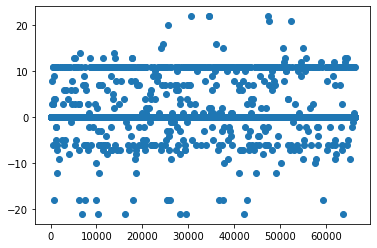

(8.912509381337454, 112.2018454301963, 8.912509381337454, 112.2018454301963)

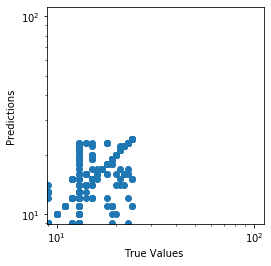

In [276]:
g=plt.scatter(y_test, Prediction)
g.axes.set_yscale('log')
g.axes.set_xscale('log')
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')

In [229]:
from sklearn.metrics.pairwise import cosine_similarity


# Vectors
vec_a = final[2][-1]
vec_b = final[20][-1]

# Dot and norm
#dot = sum(a*b for a, b in zip(vec_a, vec_b))
norm_a = sum(a*a for a in vec_a) ** 0.5
norm_b = sum(b*b for b in vec_b) ** 0.5

# Cosine similarity
cos_sim = dot / (norm_a*norm_b)

# Results
print('My version:', cos_sim)
print('Scikit-Learn:', cosine_similarity([vec_a], [vec_b]))

My version: 0.6708203932499369
Scikit-Learn: [[0.67082039]]


In [259]:
finaltest=final[0:20]
result=[]

In [260]:
for i in range(len(final)):
    res=[]
    for j in range(len(final)):
        vec_a = final[i][-1]
        vec_b = final[j][-1]
        if (i is not j):
            cos=cosine_similarity([vec_a], [vec_b])
            similarity=cos[0][0]*100
            similarity=float(similarity)
            similarity=round(similarity, 2)
            #print(similarity)
            #print(type(similarity))
        else:
            similarity=1
            similarity=1*100
        res.append(similarity) 
    result.append(res)
    

KeyboardInterrupt: 

In [258]:
print(len(result))

[[100, 20.41, 35.36, 0.0, 20.41, 17.68, 15.81, 25.0, 31.62, 20.41, 40.82, 20.41, 17.68, 20.41, 25.0, 25.0, 15.81, 20.41, 25.0, 20.41], [20.41, 100, 28.87, 0.0, 0.0, 0.0, 0.0, 40.82, 25.82, 0.0, 33.33, 0.0, 0.0, 0.0, 0.0, 40.82, 0.0, 0.0, 0.0, 16.67], [35.36, 28.87, 100, 0.0, 28.87, 25.0, 44.72, 70.71, 44.72, 28.87, 57.74, 28.87, 25.0, 57.74, 35.36, 35.36, 22.36, 28.87, 35.36, 28.87], [0.0, 0.0, 0.0, 100, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33], [20.41, 0.0, 28.87, 0.0, 100, 28.87, 25.82, 0.0, 25.82, 33.33, 33.33, 33.33, 28.87, 33.33, 40.82, 0.0, 25.82, 33.33, 40.82, 16.67], [17.68, 0.0, 25.0, 0.0, 28.87, 100, 22.36, 0.0, 44.72, 57.74, 28.87, 28.87, 25.0, 28.87, 35.36, 0.0, 44.72, 57.74, 35.36, 14.43], [15.81, 0.0, 44.72, 0.0, 25.82, 22.36, 100, 0.0, 20.0, 25.82, 25.82, 25.82, 22.36, 51.64, 31.62, 0.0, 20.0, 25.82, 31.62, 12.91], [25.0, 40.82, 70.71, 0.0, 0.0, 0.0, 0.0, 100, 31.62, 0.0, 40.82, 0.0, 0.0, 0.0, 0.0, 50.0, 0.0, 0.0, 0.0, 20.41], [31